# Data Science z Python 3.10. Topologia sieci neuronowych
## 🇬🇧 Data Science with Python 3.10. Topology of a Neural Network
#### 👨‍🏫 PhD, M.Sc. Psych., M.Sc. IT, Wojciech Oronowicz-Jaśkowiak
#### 🤖 https://github.com/aipogodzinach

### 1. Import bibliotek

In [17]:
!pip install mnist

import numpy as np
import math
import mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from keras.utils.vis_utils import plot_model as plot_model

# zaimportujemy biblioteki, które pozwolą nam na pracę podczas tego ćwiczenia
# musimy doinstalować tylko jedną z nich (mnist), która zawiera materiał treningowy oraz testowy

### 2. Funkcje aktywacji

W trakcie wykładu omawiane były funkcje aktywacji. Funkcje te cechują się różnymi właściwościami, które sprawiają, że mogą być one przydatne w zadaniach klasyfikacji do jednej z dwóch klas lub do ich większej ilości (np. softmax). Zanim zaczniemy nasze podstawowe zadanie napisz pozostałe funkcje aktywacji, korzystając z podanego szablonu.

Na tym etapie tworzymy nowe zmienne, które będą odnosiły się do wartości wyjściowych pewnej sieci neuronowej.

In [3]:
x = np.array([1.3, 0.32, 0.21]) # wyjścia dla softmax
y = 2 # wyjście dla sigmoid
a = -9 # wyjście dla relu
z = 4 # wyjście dla tangensa hiperbolicznego

Stworzymy teraz prostą implementację funkcji softmax przyjmującą x.

In [4]:
def softmax(x):
    return np.exp(x) / sum(np.exp(x))
print(softmax(x))

[0.58427337 0.21928428 0.19644234]



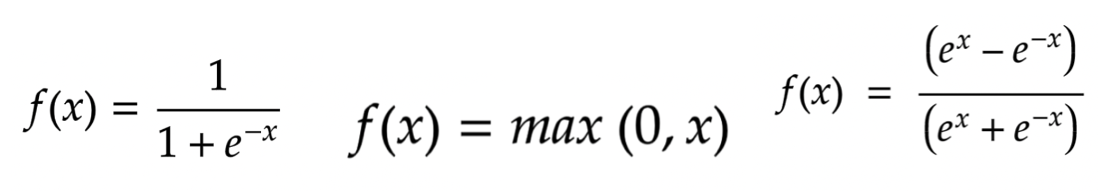

In [5]:
def sigmoid(y):
  return 1 / (1 + math.exp(-y))
print(sigmoid(y))

0.8807970779778823


In [6]:
def relu(a):
    return max(0.0, a)
print(relu(a))

0.0


In [7]:
def tanh(z):
    return np.sinh(z) / np.cosh(z) or -1j * np.tan(1j*z)
print(tanh(z))

0.9993292997390669


### 3. Tworzenie sieci neuronowej

#### 3.1. Przygotowanie danych treningowych i testowych

Zacznim przejdziemy do trenowania sieci neuronowej musimy najpierw rozwiązać kilka problemów. Pierwszym z nich jest stworzenie odpowiednich zmiennych odnoszących się do danych treningowych oraz danych testowych.

In [8]:
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

Zanim przejdziemy dalej możemy podejrzeć nasze dane. Zastanówmy się do czego odnoszą się liczby 60000 oraz 28?

In [9]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


#### 3.2. Normalizacja i "spłaszczenie" danych

Na tym etapie powinniśmy mieć stworzone cztery zmienne odnoszące się do materiału treningowego oraz etykiet (osobno dla zbioru treningowego i testowego). Zanim przejdziemy dalej musimy zadać jeszcze o normalizację. Co właściwie zamierzamy zrobić z naszymi danymi? Chcemy sprowadzić wartości pikseli z zakresu od 0-255 do nowego zakresu -0.5-0.5. Dlaczego to robimy?

In [10]:
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

Możemy jeszcze raz podejrzeć nasze dane, ale na tym etapie jeszcze nic się nie zmieniło.

In [11]:
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


Teraz dokonujemy "spłaszczenia" (flatten) naszych danych. Skąd się bierze wartość 784? (to po prostu 28*28 = 784). Każdy obraz w danych treningowych MNIST ma wymiary 28 x 28 (oraz informację odnoszącą się do skali szarości). Spłaszczymy każdy obraz 28x28 do 784-wymiarowego wektora, którego użyjemy jako danych wejściowych do naszej sieci neuronowej.

In [12]:
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

Teraz widzimy, że kształt naszych danych zmienił.

In [13]:
print(train_images.shape)

(60000, 784)


#### 3.3. Przygotowanie architektury sieci neuronowej

Mamy już przygotowane dane, dokonaliśmy ich normalizacji oraz przeprowadziliśmy "spłaszczenie". Przechodzimy w końcu do etapu tworzenia architektury naszej sieci neuronowej. Wykorzystamy w tym celu klasę Sequential. Mamy do wyboru teraz kilka możliwości, które zależą od danych, które chcemy analizować. 

*   Zważywszy na to, że chcemy przeprowadzić "prostą" klasyfikację danych MNIST (jeszcze bez wykorzystania CNN) stworzymy sieć neuronową, która będzie składała się z warstw gęstych (Dense), w których każdy neuron będzie połączony z innym neuronem. 
*   Musimy tylko ustalić liczbę nodes oraz odpowiednią funkcję aktywacji.
*   Wskazujemy również odpowiednią wartość wejściową (input_shape).
*   Ostatnia wartość nodes odnosi się do ilości klas, ale jak ustalić wartość nodes w poprzednich warstwach?


In [14]:
from keras.layers import Dropout

model = Sequential([
  Dense(256, activation='relu', input_shape=(784,)),
  Dense(128, activation='relu'),
  Dropout(0.1, input_shape=(784,)),
  Dense(128, activation='relu'),
  Dense(128, activation='relu'),
  Dropout(0.1, input_shape=(784,)),
  Dense(10, activation='softmax'), 
])

#### 3.4. Optymalizator, funkcja straty i metryki

W tym miejscu dokonujemy wyboru odpowiedniego optymalizatora, dobieramy funkcję straty oraz wskazujemy metryki, które wykorzystamy do oceny przydatności naszego modelu. Zagadnienia te zostaną poruszone na następnym wykładzie. 

In [15]:
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

#### 3.5. Trenowanie sieci neuronowej

W końcu przechodzimy do etapu trenowania przygotowanej przez nas architektury sieci neuronowej. Musimy jeszcze określić liczbę epok ("cykli trenowania sieci") oraz batch size. Pod koniec uzyskujemy informacje dotyczące straty walidacji oraz dokładności klasyfikacji.

In [16]:
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=30,
)

Epoch 1/5
2000/2000 [==============================] - 13s 6ms/step - loss: 0.3318 - accuracy: 0.8965
Epoch 2/5
2000/2000 [==============================] - 9s 5ms/step - loss: 0.1760 - accuracy: 0.9472
Epoch 3/5
2000/2000 [==============================] - 9s 4ms/step - loss: 0.1403 - accuracy: 0.9577
Epoch 4/5
2000/2000 [==============================] - 8s 4ms/step - loss: 0.1170 - accuracy: 0.9642
Epoch 5/5
2000/2000 [==============================] - 8s 4ms/step - loss: 0.1040 - accuracy: 0.9685


Zadanie 1

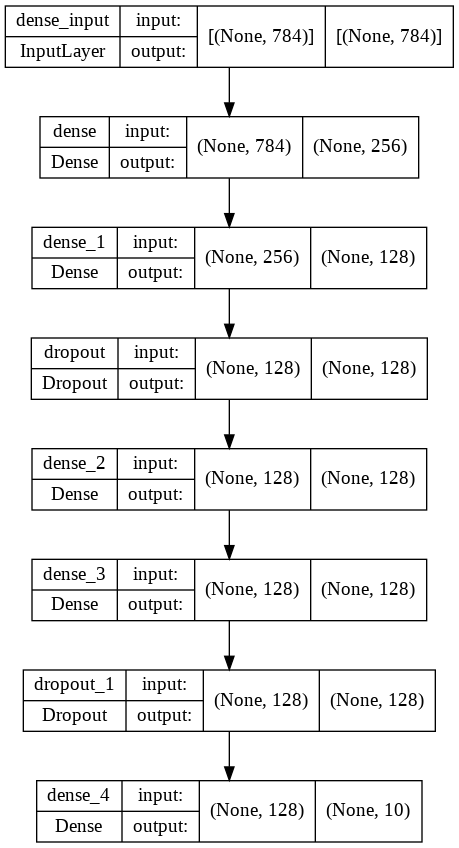

In [18]:
plot_model(model, to_file="model.png", show_shapes=True)

Zadanie 2

In [20]:
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=100,
  batch_size=30,
)

Epoch 1/100
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0931 - accuracy: 0.9720
Epoch 2/100
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0868 - accuracy: 0.9742
Epoch 3/100
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0778 - accuracy: 0.9762
Epoch 4/100
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0742 - accuracy: 0.9770
Epoch 5/100
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0677 - accuracy: 0.9787
Epoch 6/100
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0642 - accuracy: 0.9799
Epoch 7/100
2000/2000 [==============================] - 9s 4ms/step - loss: 0.0608 - accuracy: 0.9812
Epoch 8/100
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0566 - accuracy: 0.9823
Epoch 9/100
2000/2000 [==============================] - 8s 4ms/step - loss: 0.0575 - accuracy: 0.9823
Epoch 10/100
2000/2000 [==============================] - 8s 4ms/step - l

KeyboardInterrupt: ignored

Klasyfikacja stabilizuje się po 28 epoce, wartość straty zaczyna 'krążyć' wokół 0.0331 +/- 0.0014. 

Zadanie 3

In [22]:
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=20,
)

Epoch 1/5
3000/3000 [==============================] - 16s 5ms/step - loss: 0.0472 - accuracy: 0.9877
Epoch 2/5
3000/3000 [==============================] - 15s 5ms/step - loss: 0.0401 - accuracy: 0.9892
Epoch 3/5
3000/3000 [==============================] - 14s 5ms/step - loss: 0.0380 - accuracy: 0.9892
Epoch 4/5
3000/3000 [==============================] - 15s 5ms/step - loss: 0.0433 - accuracy: 0.9884
Epoch 5/5
3000/3000 [==============================] - 14s 5ms/step - loss: 0.0431 - accuracy: 0.9888


Zmniejszony parametr straty oraz nieznacznie zwiększona dokładność, znacznie zwiększony czas przejścia przez epoki

Zadanie 4


In [23]:
model = Sequential([
  Dense(2137, activation='relu', input_shape=(784,)),
  Dense(420, activation='relu'),
  Dropout(0.1, input_shape=(784,)),
  Dense(100, activation='relu'),
  Dropout(0.2, input_shape=(784,)),
  Dense(69, activation='relu'),
  Dropout(0.5, input_shape=(784,)),
  Dense(28, activation='relu'),
  Dense(10, activation='softmax'), 
])
model.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
model.fit(
  train_images,
  to_categorical(train_labels),
  epochs=5,
  batch_size=30,
)

Epoch 1/5
2000/2000 [==============================] - 49s 24ms/step - loss: 0.5541 - accuracy: 0.8335
Epoch 2/5
2000/2000 [==============================] - 48s 24ms/step - loss: 0.2372 - accuracy: 0.9390
Epoch 3/5
2000/2000 [==============================] - 47s 23ms/step - loss: 0.1872 - accuracy: 0.9520
Epoch 4/5
2000/2000 [==============================] - 46s 23ms/step - loss: 0.1559 - accuracy: 0.9598
Epoch 5/5
2000/2000 [==============================] - 46s 23ms/step - loss: 0.1346 - accuracy: 0.9655


Zadanie 5


In [25]:
model_x = Sequential([
  Dense(256, activation='linear', input_shape=(784,)),
  Dense(256, activation='linear'),
  Dense(256, activation='linear'),
  Dense(128, activation='linear'),
  Dense(128, activation='linear'),
  Dense(128, activation='linear'),
  Dense(64, activation='linear'),
  Dense(64, activation='linear'),
  Dense(64, activation='linear'),
  Dense(10, activation='linear')
])
model_y = Sequential([
  Dense(256, activation='linear', input_shape=(784,)),
  Dense(128, activation='linear'),
  Dense(64, activation='linear'),
  Dense(10, activation='linear')
])
model_x.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
model_y.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)
print('Model X: =======================')
model_x.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  batch_size=30,
)
print('Model Y: =======================')
model_y.fit(
  train_images,
  to_categorical(train_labels),
  epochs=10,
  batch_size=30,
)

Model X: =======================
Epoch 1/10
2000/2000 [==============================] - 13s 6ms/step - loss: 6.3013 - accuracy: 0.0975
Epoch 2/10
2000/2000 [==============================] - 13s 6ms/step - loss: 6.2707 - accuracy: 0.0974
Epoch 3/10
2000/2000 [==============================] - 12s 6ms/step - loss: 6.2708 - accuracy: 0.0974
Epoch 4/10
2000/2000 [==============================] - 12s 6ms/step - loss: 6.2707 - accuracy: 0.0974
Epoch 5/10
2000/2000 [==============================] - 12s 6ms/step - loss: 6.2707 - accuracy: 0.0974
Epoch 6/10
2000/2000 [==============================] - 13s 6ms/step - loss: 6.2707 - accuracy: 0.0974
Epoch 7/10
2000/2000 [==============================] - 12s 6ms/step - loss: 6.2707 - accuracy: 0.0974
Epoch 8/10
2000/2000 [==============================] - 13s 7ms/step - loss: 6.2707 - accuracy: 0.0974
Epoch 9/10
2000/2000 [==============================] - 13s 7ms/step - loss: 6.2707 - accuracy: 0.0974
Epoch 10/10
2000/2000 [=================